# **IMPORT LIBRARY**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.optimizers import Adam


import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


# **DATA COLLECTION**

In [ ]:
from keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train[3]

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

# **DATA PREPROCESSING**

In [ ]:
# # Normalize

# X_train = X_train / 255.0
# X_test = X_test / 255.0

In [ ]:
from keras.utils import to_categorical

#Categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
Y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# **MODEL DESIGN**

*   **Convolution Neural Network**



In [ ]:
input_shape = X_train.shape[1:]
model = Sequential()
model.add(Conv2D(32, (3,3), strides=2, padding='same',
                 activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(64, (3,3), strides=2, padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

In [ ]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# **MODEL TRAINING**

In [ ]:
hist = model.fit(X_train, Y_train,
                epochs=100,
                batch_size=1000,
                shuffle=True,
                validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 10s 196us/step - loss: 5.9642 - acc: 0.1394 - val_loss: 2.1901 - val_acc: 0.1842
Epoch 2/100
50000/50000 [==============================] - 2s 37us/step - loss: 2.0741 - acc: 0.2254 - val_loss: 1.8653 - val_acc: 0.3128
Epoch 3/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.8455 - acc: 0.3143 - val_loss: 1.7281 - val_acc: 0.3601
Epoch 4/100
50000/50000 [==============================] - 2s 36us/step - loss: 1.7239 - acc: 0.3658 - val_loss: 1.6379 - val_acc: 0.3963
Epoch 5/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.6463 - acc: 0.3950 - val_loss: 1.5822 - val_acc: 0.4159
Epoch 6/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.5865 - acc: 0.4196 - val_loss: 1.5177 - val_acc: 0.4434
Epoch 7/100
50000/

# **MODEL EVALUATION**

In [ ]:
score = model.evaluate(X_test, Y_test)
print("Accuracy: ", score[1]*100, "%")

10000/10000 [==============================] - 1s 82us/step
Accuracy:  60.029999999999994 %


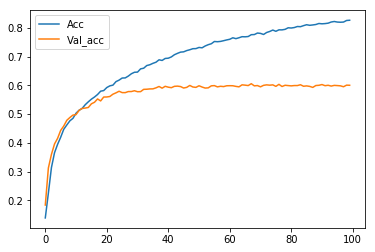

In [ ]:
#Show accuracy graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Acc', 'Val_acc'])
plt.show()

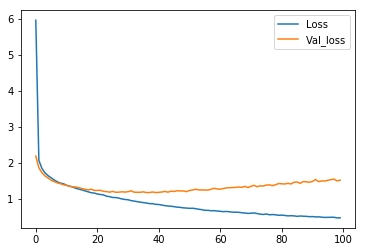

In [ ]:
#Show error value graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Loss', 'Val_loss'])
plt.show()

# **PREDICT**

In [ ]:
dict_label = {0:'airplane', 1:'automobile', 2:'bird',
              3:'cat', 4:'deer', 5:'dog',
              6:'frog', 7:'horse', 8:'ship', 9:'truck'}
def predict():
  some_random_number = np.random.randint(low = 0, high = len(X_test)-1, size=4)
  sample_images = X_train[some_random_number]
  sample_label = Y_train[some_random_number]
  predicted = model.predict(sample_images)
  predicted = np.argmax(predicted, axis=1)
  true_label = np.argmax(sample_label, axis=1)
  fig, axs = plt.subplots(2, 2)
  for row in range(2):
    for col in range(2):
      if row == 0:
        true = true_label[row+col]
        pred = predicted[row+col]
        axs[row, col].imshow(sample_images[row+col])
      else:
        true = true_label[row+col+1]
        pred = predicted[row+col+1]
        axs[row, col].imshow(sample_images[row+col+1])
      axs[row, col].set_title('True: %s\nPredicted: %s' % (dict_label[true], dict_label[pred]))
      axs[row, col].axis('off')

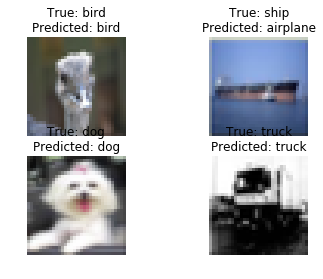

In [ ]:
predict()

In [ ]:
model.save_weights('model_weights.h5')